# Group Project  
"California Housing Prices"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('california-housing-data.csv') # Reading the data set 
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Describing the Data 

In [4]:
df.describe() 
# Describing the data to check the mean, standard deviation and other descriptive statistics
# Notice that the number of entries for bedrooms is less that the rest of the varible, which indicates null values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Cleaning the Data

In [5]:
df.isna().sum() 
# Calculating the number of missing values for ecah column
# There are 207 missing values in the total bedrooms

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df = df.dropna()
# Using this function to drop the missing values

In [7]:
df.isna().any()
# This checks for NaN (not a number) and returns the answer as False or True 

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [8]:
df.duplicated().sum()
# Checking if there are any duplicates but there isn't 

0

# Distribution of the Data

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

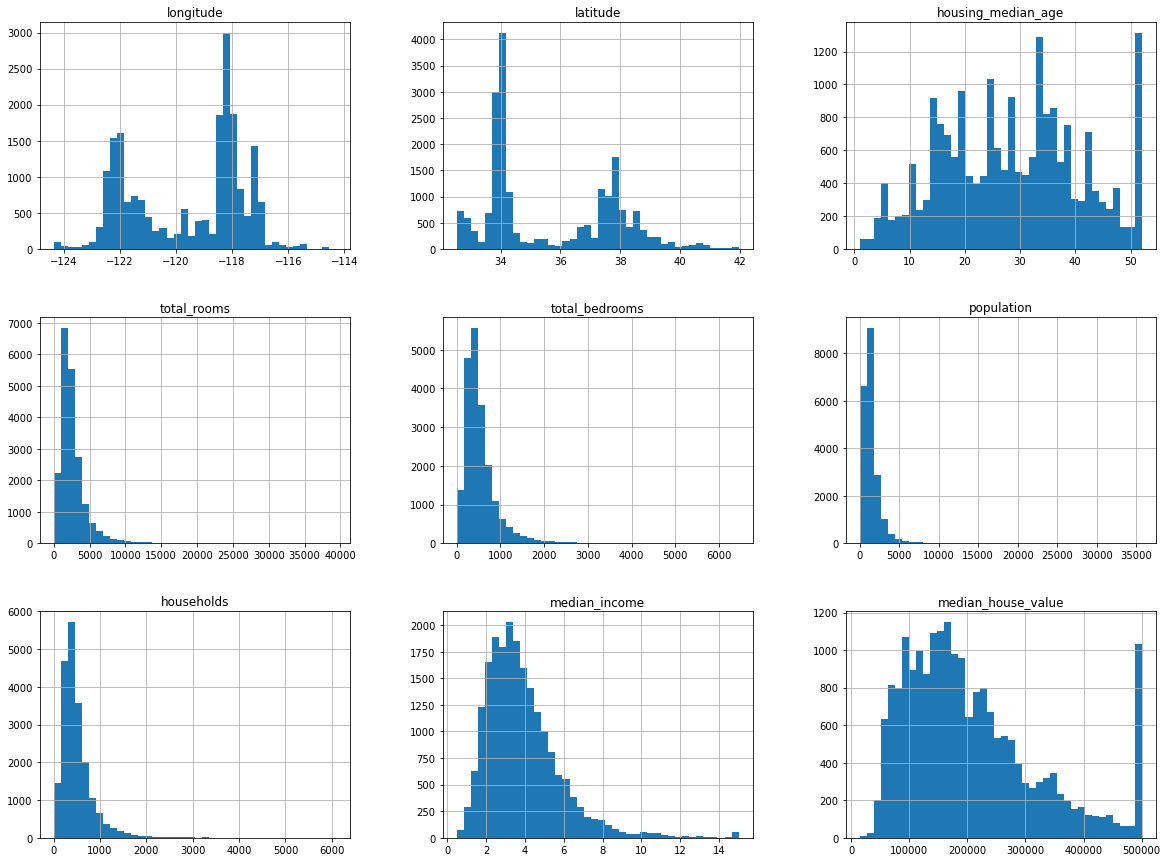

In [9]:
df.hist(bins = 40, figsize = (20,15))
# Checking the distribution of the features by plotting their histograms 

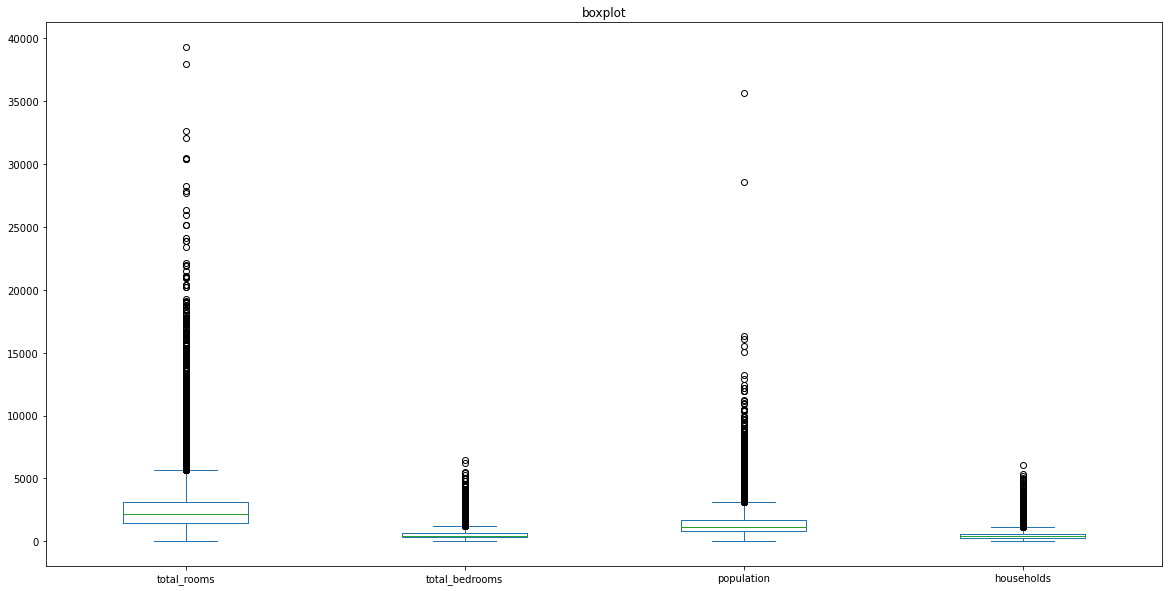

In [10]:
ax = df[['total_rooms','total_bedrooms',
         'population','households']].plot(kind='box', title='boxplot', figsize = (20,10))
# Checking for outliers using boxplots
# We will just remove the extreme outliers 

# Removing Outliers 

In [11]:
outs1 = df["median_house_value"] > 500000
outs1_index = outs1[outs1].index
df = df.drop(index = outs1_index)

In [12]:
outs2 = df["total_rooms"] > 25000
outs2_index = outs2[outs2].index
df = df.drop(index = outs2_index)

In [13]:
outs3 = df["population"] > 15000
outs3_index = outs3[outs3].index
df = df.drop(index = outs3_index)

In [14]:
#outs1 = df["housing_median_age"] > 50
#outs1_index = outs1[outs1].index
#df = df.drop(index = outs1_index)

In [15]:
#outs5 = df["households"] > 4000
#outs5_index = outs4[outs5].index
#df = df.drop(index = outs5_index)

C:\Users\hudak\AppData\Local\Temp/ipykernel_15492/462007290.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corrs, dtype=np.bool))


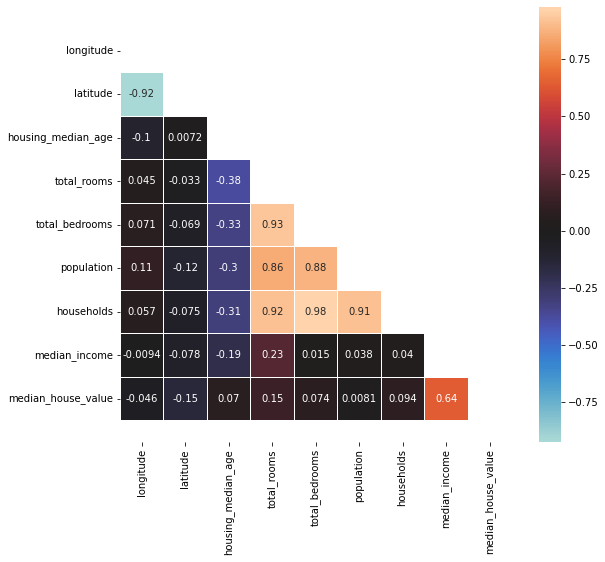

In [16]:
corrs = df.corr() # calculate the correlation table
# as this is a symmetric table, set up a mask so that we only plot values below the main diagonal
mask = np.triu(np.ones_like(corrs, dtype=np.bool)) 
f, ax = plt.subplots(figsize=(10, 8)) # initialise the plots and axes
# plot the correlations as a seaborn heatmap, with a colourbar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5) 
# do some fiddling so that the top and bottom are not obscured
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);

In [17]:
df.shape #The shape of our data after removing outliers and missing values

(19461, 10)

In [18]:
df.info()
# Chacking what is the types of our data 
# The only catigorical data we have is the ocean proximity

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19461 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19461 non-null  float64
 1   latitude            19461 non-null  float64
 2   housing_median_age  19461 non-null  float64
 3   total_rooms         19461 non-null  float64
 4   total_bedrooms      19461 non-null  float64
 5   population          19461 non-null  float64
 6   households          19461 non-null  float64
 7   median_income       19461 non-null  float64
 8   median_house_value  19461 non-null  float64
 9   ocean_proximity     19461 non-null  object 
dtypes: float64(9), object(1)
memory usage: 2.1+ MB


In [19]:
df['ocean_proximity'].value_counts()
# To see what are the catigories for the ocean proximity

<1H OCEAN     8494
INLAND        6467
NEAR OCEAN    2418
NEAR BAY      2077
ISLAND           5
Name: ocean_proximity, dtype: int64

In [20]:
#df = pd.get_dummies(data = df, columns = ["ocean_proximity"],drop_first = True)
#df.head()
# We want to get a dummy varibles for the ocean proximity

In [21]:
#df = df[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms',
        # 'population','households','median_income','ocean_proximity_INLAND',
        # 'ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN',
        #'median_house_value']]
#df
# Just reordering our variables to have the dependent varible (median_house_value) at the end

In [22]:
# Here we tried to remove all otliers but it decreased the data we have from 20433 columns to 4123

In [23]:
#IQRTOTALROOMS = (3143.000000-1450.000000)*1.5
#IQRTOTALROOMS

In [24]:
#IQRTOTALBEDROOMS = (647.000000-296.000000)*1.5
#IQRTOTALBEDROOMS

In [25]:
#IQRPOPULATION = (1722.000000-787.000000)*1.5
#IQRPOPULATION

In [26]:
#IQRHOUSEHOLDS = (604.000000-280.000000)*1.5
#IQRHOUSEHOLDS

In [27]:
#IQRINCOME=(4.744000-2.563700)*1.5
#IQRINCOME

In [28]:
#IQRVALUE = (264700.000000- 119500.000000)*1.5
#IQRVALUE

In [29]:
#outs1 = df["total_rooms"] > 2539.5
#outs1_index = outs1[outs1].index
#df = df.drop(index = outs1_index)

In [30]:
#outs2 = df["total_bedrooms"] > 526.5
#outs2_index = outs2[outs2].index
#df = df.drop(index = outs2_index)

In [31]:
#outs3 = df["population"] > 1402.5
#outs3_index = outs3[outs3].index
#df = df.drop(index = outs3_index)

In [32]:
#outs4 = df["households"] > 486.0
#outs4_index = outs4[outs4].index
#df = df.drop(index = outs4_index)

In [33]:
#outs5 = df["median_income"] > 3.27045
#outs5_index = outs5[outs5].index
#df = df.drop(index = outs5_index)

In [34]:
#outs6 = df["median_house_value"] > 217800.0
#outs6_index = outs6[outs6].index
#df = df.drop(index = outs6_index)

# Ocean Proximity

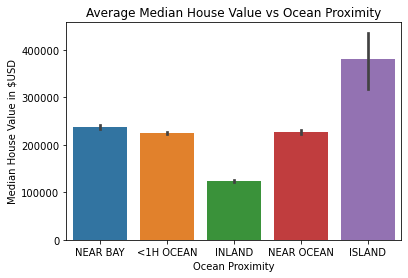

In [35]:
ax = sns.barplot(data=df, x="ocean_proximity", y="median_house_value")
plt.title('Average Median House Value vs Ocean Proximity');
ax.set(xlabel='Ocean Proximity', ylabel='Median House Value in $USD')
plt.show()

# Ocean Proximity Data Cleaning

In [36]:
df.ocean_proximity.str.count("ISLAND").sum() #Count how many homes live on an island in this sample

5

In [37]:
df[df['ocean_proximity'] == 'ISLAND']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


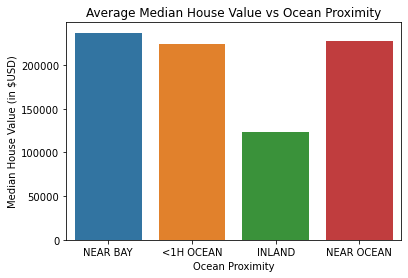

In [38]:
#Removal of the island data since there are only two houses on it
df = df.replace(to_replace ="ISLAND",
                 value = np.nan)
ax = sns.barplot(data=df, x="ocean_proximity", y="median_house_value", ci = None)
plt.title('Average Median House Value vs Ocean Proximity');
ax.set(xlabel='Ocean Proximity', ylabel='Median House Value (in $USD)')
plt.show()

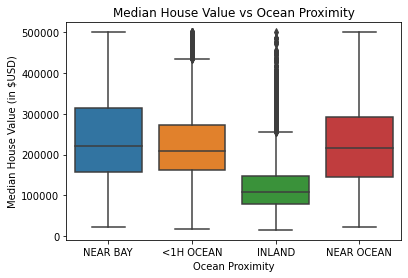

In [39]:
#boxplot
ax = sns.boxplot(data=df, x="ocean_proximity", y="median_house_value")
plt.title('Median House Value vs Ocean Proximity');
ax.set(xlabel='Ocean Proximity', ylabel='Median House Value (in $USD)')
plt.show()

# Analysis of Data

In [40]:
#Finding the difference in median house value for homes near the bay to near the ocean
bay = df[df['ocean_proximity'] == 'NEAR BAY']
ocean = df[df['ocean_proximity'] == 'NEAR OCEAN']
bay['median_house_value'].mean() - ocean['median_house_value'].mean()

9622.205967680202

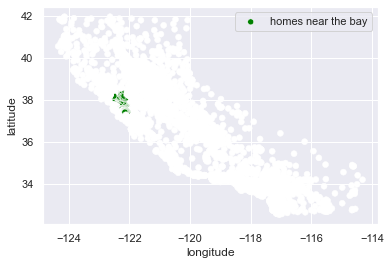

In [41]:
#Plotting latittude and Longitude of homes in "NEAR BAY"
sns.set()
sns.scatterplot(data=df, 
            x="longitude", y="latitude",
            hue = "ocean_proximity",
            palette = sns.blend_palette(['green','white','white','white'], 4),
            legend = False,
             );
plt.legend(labels = ['homes near the bay'])
plt.show()

# General Trend Apart from the San Francisco Data

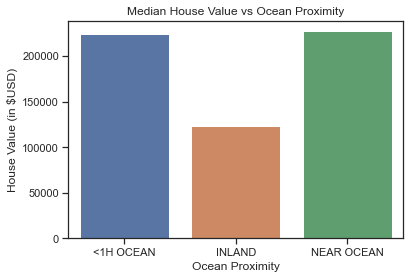

In [42]:
#Removal of the near bay data
sns.set_style("ticks")
#sns.set_style("white")
import seaborn as sns

df_new = df.replace(to_replace ="NEAR BAY",
                 value = np.nan)
ax = sns.barplot(data=df_new, x="ocean_proximity", y="median_house_value", ci = None)
plt.title('Median House Value vs Ocean Proximity');
ax.set(xlabel='Ocean Proximity', ylabel='House Value (in $USD)')
plt.show()

In [43]:
#Finding difference in average housing price for inland homes compared to near ocean homes
inland = df[df['ocean_proximity'] == 'INLAND']
near_ocean = df[df['ocean_proximity'] == 'NEAR OCEAN']
near_ocean['median_house_value'].mean()-inland['median_house_value'].mean()

103975.79319297834

In [44]:
#Finding difference in average housing price for <1H ocean homes compared to inland homes
inland = df[df['ocean_proximity'] == 'INLAND']
H1 = df[df['ocean_proximity'] == '<1H OCEAN']
H1['median_house_value'].mean()-inland['median_house_value'].mean()

100761.12431660708

# Population and Median house Value

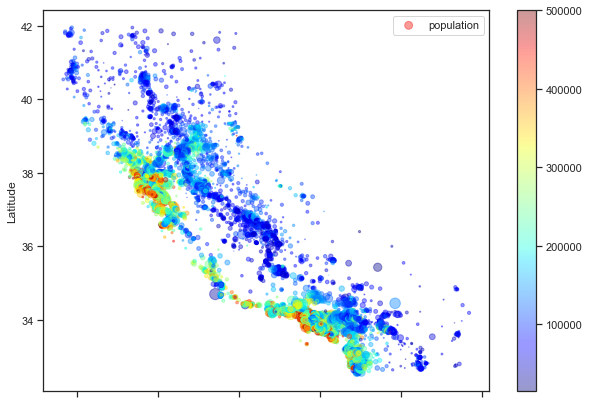

In [45]:
df.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
            s = df["population"]/100, label = "population",
            c = df["median_house_value"], cmap = "jet", colorbar = True, figsize = (10,7))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
# scatter plot graph to show the relationship between location, population and median_house_value
# set symbol size on population
#  set symbol color on house value 

In [46]:
#Counting the total population for homes in different areas
inland = df[df['ocean_proximity'] == 'INLAND']
near_ocean = df[df['ocean_proximity'] == 'NEAR OCEAN']
bay = df[df['ocean_proximity'] == 'NEAR BAY']
close_ocean = df[df['ocean_proximity'] == '<1H OCEAN']

print("the number of people surveyed which were inland was..." , inland['population'].sum())
print("the number of people surveyed which were near the ocean was...", near_ocean['population'].sum())
print("the number of people surveyed which were less than one hour from the ocean was...", close_ocean['population'].sum())
print("the number of people surveyed which were near the bay was...", bay['population'].sum())


the number of people surveyed which were inland was... 8993390.0
the number of people surveyed which were near the ocean was... 3313624.0
the number of people surveyed which were less than one hour from the ocean was... 12930595.0
the number of people surveyed which were near the bay was... 2590022.0


In [47]:
#Regression model of median house value with respect to ocean proximity and population
df_new = pd.get_dummies(data = df, columns = ["ocean_proximity"], drop_first = True)

X = df_new[["ocean_proximity_INLAND", 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN','population']]
Y = df_new['median_house_value'] 

# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X_train,Y_train) # fit the data to the model
training_score = linear.score(X_train,Y_train)

# use the independent variables for the testing set to predict the target variable
preds_linear = linear.predict(X_test) 
# calculate the correlation of the predicted and actual target variables
rsquared_linear = r2_score(Y_test,preds_linear)

print("Intercept is",np.round(linear.intercept_,2))
print("Coefficients are",np.round(linear.coef_, 2))

Intercept is 224479.08
Coefficients are [-1.0031188e+05  1.2727780e+04  3.7999000e+03 -5.9000000e-01]


In [1]:
#Training and Testing Scores for population and ocean proximity to median house value
print("The training score is", np.round(training_score,2))
print("Testing score is",np.round(rsquared_linear, 2))

NameError: name 'np' is not defined

# Median Income and Median House Value

<AxesSubplot:>

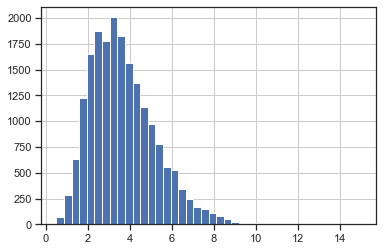

In [49]:
df["median_income"].hist(bins = 40)

<AxesSubplot:>

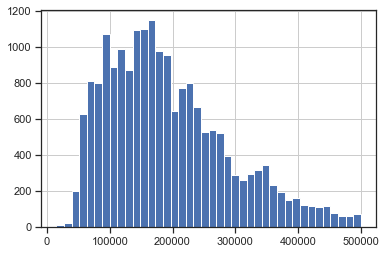

In [50]:
df["median_house_value"].hist(bins = 40)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

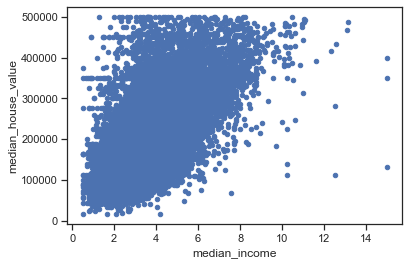

In [51]:
df.plot.scatter(x='median_income',y='median_house_value')

For the median income and the median house value data, the scatterplot displays a moderately strong, 
positive relationship.As median income increases, 
the median house value also tends to increase. Which demonstrate that people with higher income tend to purchase 
more expensive house

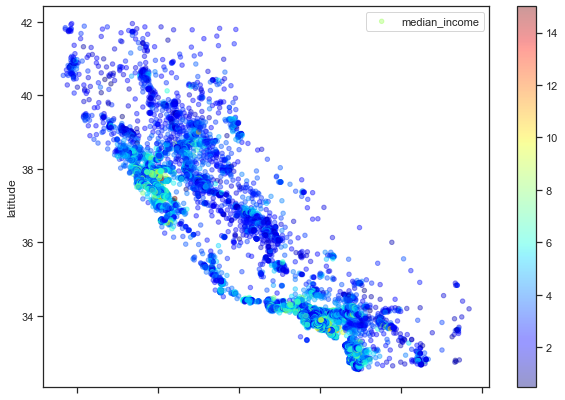

In [52]:
df.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
            #s = df["population"]/100, label = "population",
            c = df["median_income"], cmap = "jet", colorbar = True, figsize = (10,7),label='median_income')
plt.legend()

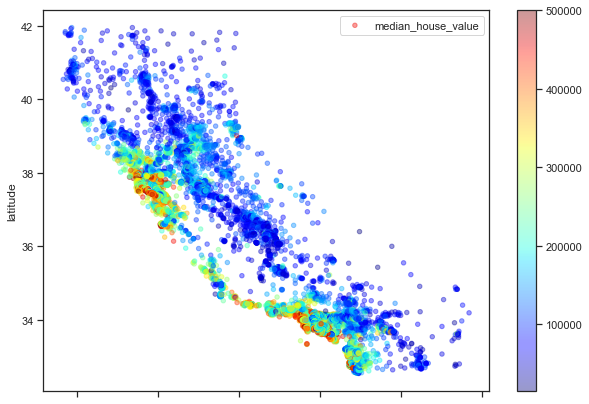

In [53]:
df.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
            #s = df["population"]/100, label = "population",
            c = df["median_house_value"], cmap = "jet", colorbar = True, figsize = (10,7),label='median_house_value')
plt.legend()

<AxesSubplot:ylabel='median_income'>

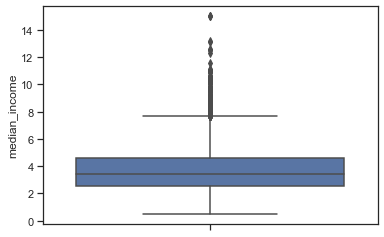

In [54]:
sns.boxplot(data = df, y = "median_income")

<AxesSubplot:ylabel='median_house_value'>

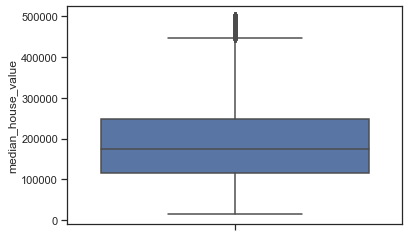

In [55]:
sns.boxplot(data = df, y = "median_house_value")

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df[["median_income"]]
Y = df['median_house_value'] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 
linear = LinearRegression(fit_intercept=True)
linear.fit(X_train,Y_train) 
training_score = linear.score(X_train,Y_train)
preds_linear = linear.predict(X_test) 
rsquared_linear = r2_score(Y_test,preds_linear)
print("Intercept is",np.round(linear.intercept_,2))
print("Coefficients are",np.round(linear.coef_, 2))
print("The training score is", np.round(training_score,2))
print("Testing score is",np.round(rsquared_linear, 2))

Intercept is 45591.9
Coefficients are [39918.96]
The training score is 0.41
Testing score is 0.41


In [57]:
#Regression model of median house value with respect to ocean proximity and median income
df_new = pd.get_dummies(data = df, columns = ["ocean_proximity"], drop_first = True)

X = df_new[["ocean_proximity_INLAND", 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN','median_income']]
Y = df_new['median_house_value'] 

# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X_train,Y_train) # fit the data to the model
training_score = linear.score(X_train,Y_train)

# use the independent variables for the testing set to predict the target variable
preds_linear = linear.predict(X_test) 
# calculate the correlation of the predicted and actual target variables
rsquared_linear = r2_score(Y_test,preds_linear)

print("Intercept is",np.round(linear.intercept_,2))
print("Coefficients are",np.round(linear.coef_, 2))

Intercept is 83939.32
Coefficients are [-72469.    15874.18  15081.95  35077.83]


In [58]:
#Training and Testing Scores for median house income and ocean proximity to median house value
print("The training score is", np.round(training_score,2))
print("Testing score is",np.round(rsquared_linear, 2))

The training score is 0.55
Testing score is 0.55


# Total Rooms Total Bedrooms, and Population

In [59]:
df['room_per_household'] =df['total_rooms']/df['households']
df['population_per_household'] =df['population']/df['households']
df['bedroom_per_room'] =df['total_bedrooms']/df['total_rooms'] 
df['bedroom_per_household'] =df['total_bedrooms']/df['households'] # Creating new Features
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,room_per_household,population_per_household,bedroom_per_room,bedroom_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096,1.081081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625,1.133333
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208,1.315789
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173,1.120092
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892,1.171920


In [60]:
collum=df['population_per_household']
max_value= collum.max()
print(max_value)

1243.3333333333333


C:\Users\hudak\AppData\Local\Temp/ipykernel_15492/462007290.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corrs, dtype=np.bool))


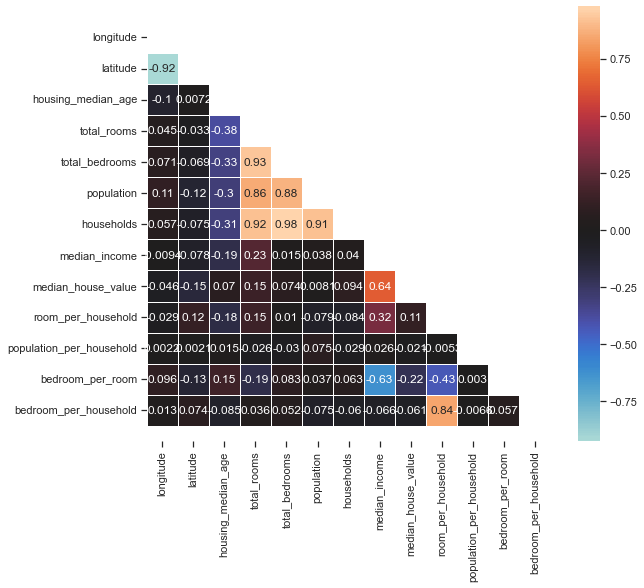

In [61]:
corrs = df.corr() # calculate the correlation table
# as this is a symmetric table, set up a mask so that we only plot values below the main diagonal
mask = np.triu(np.ones_like(corrs, dtype=np.bool)) 
f, ax = plt.subplots(figsize=(10, 8)) # initialise the plots and axes
# plot the correlations as a seaborn heatmap, with a colourbar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5) 
# do some fiddling so that the top and bottom are not obscured
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);

In [62]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 
X = df[['total_rooms' ]]
Y = df['population'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

linear = LinearRegression(fit_intercept=True) 
linear.fit(X_train,Y_train) 
print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))
training_score = linear.score(X, Y) 
preds_linear = linear.predict(X_test)
rsquared_linear = r2_score(Y_test,preds_linear) 

print("Correlation score is",np.round(np.sqrt(training_score), 3))
print("Training score is",np.round(training_score, 3))
print("Testing score is",np.round(rsquared_linear, 3))

Coefficients are [0.444]
Intercept is 278.247
Correlation score is 0.857
Training score is 0.734
Testing score is 0.731


<AxesSubplot:xlabel='population', ylabel='total_rooms'>

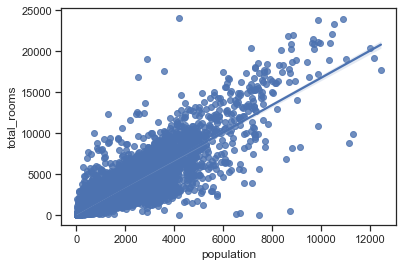

In [63]:
sns.regplot(data=df, x='population', y='total_rooms')

<AxesSubplot:xlabel='total_bedrooms', ylabel='households'>

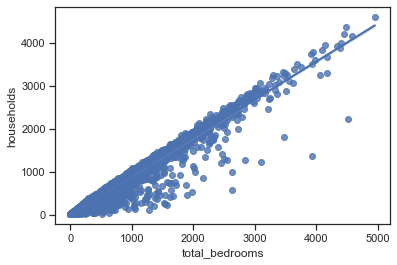

In [64]:
sns.regplot(data=df, x='total_bedrooms', y='households')

The relationship between total room and population is a very strong positive relationship we can imply that when the population increaese , the total room increase as well. 

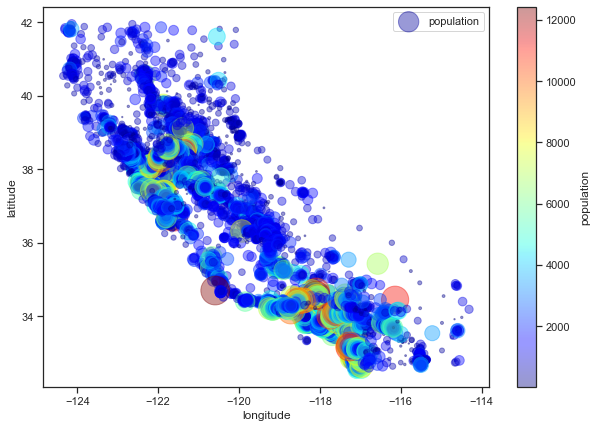

In [65]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,s=df["population"]/15, label="population", figsize=(10,7),c="population",cmap=plt.get_cmap("jet"), colorbar=True,sharex=False)
plt.legend()

Based on the relationship betwee latitude and longtitide, we can imply that the area between cities like Los Angelias ans San Francisco where the population is a lot, the total room increase.  

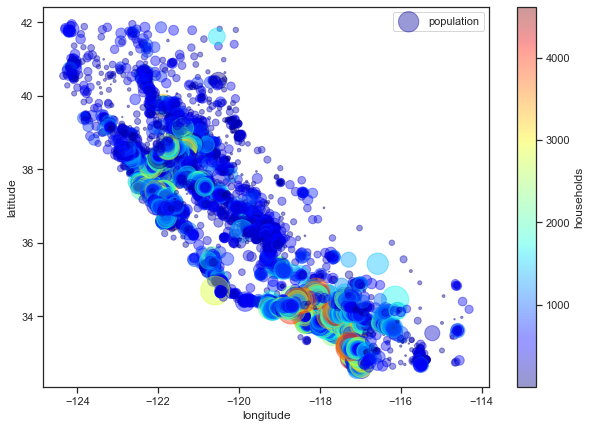

In [66]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,s=df["population"]/15, label="population", figsize=(10,7),c="households",cmap=plt.get_cmap("jet"), colorbar=True,sharex=False)
plt.legend()

In [67]:
X = df[['population']]
Y = df['total_bedrooms'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

linear = LinearRegression(fit_intercept=True) 
linear.fit(X_train,Y_train) 
print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))
training_score = linear.score(X, Y) 
preds_linear = linear.predict(X_test)
rsquared_linear = r2_score(Y_test,preds_linear) 

print("Correlation score is",np.round(np.sqrt(training_score), 3))
print("Training score is",np.round(training_score, 3))
print("Testing score is",np.round(rsquared_linear, 3))

Coefficients are [0.337]
Intercept is 54.68
Correlation score is 0.88
Training score is 0.775
Testing score is 0.768


In [68]:
X = df[['households']]
Y = df['total_bedrooms'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

linear = LinearRegression(fit_intercept=True) 
linear.fit(X_train,Y_train) 
print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))
training_score = linear.score(X, Y) 
preds_linear = linear.predict(X_test)
rsquared_linear = r2_score(Y_test,preds_linear) 

print("Correlation score is",np.round(np.sqrt(training_score), 3))
print("Training score is",np.round(training_score, 3))
print("Testing score is",np.round(rsquared_linear, 3))

Coefficients are [1.079]
Intercept is -0.942
Correlation score is 0.978
Training score is 0.956
Testing score is 0.954


<AxesSubplot:xlabel='bedroom_per_room', ylabel='total_rooms'>

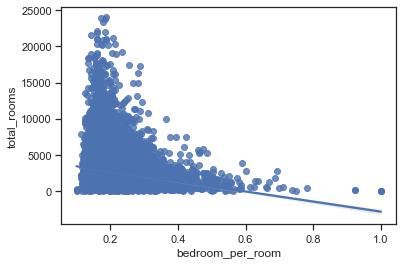

In [69]:
sns.regplot(data=df, x='bedroom_per_room', y='total_rooms')

In [70]:
X = df[['bedroom_per_room']]
Y = df['room_per_household'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

linear = LinearRegression(fit_intercept=True) 
linear.fit(X_train,Y_train) 
print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))
training_score = linear.score(X, Y) 
preds_linear = linear.predict(X_test)
rsquared_linear = r2_score(Y_test,preds_linear) 

print("Correlation score is",np.round(np.sqrt(training_score), 3))
print("Training score is",np.round(training_score, 3))
print("Testing score is",np.round(rsquared_linear, 3))

Coefficients are [-17.124]
Intercept is 9.046
Correlation score is 0.427
Training score is 0.182
Testing score is 0.239
